<a href="https://colab.research.google.com/github/Gimmi-07/FFML_Projects_and_Labs/blob/main/FFML_Module_09%2CLAB_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT

FMML Module 09, Lab 02 <br>
 NAME: Grishma Yenchilwar ( grishma.yenchilwar.cse@ghrce.raisoni.net ) <br>
 Date: 15 April 2024<br>

 Module 9: Neural Networks<br>
 Lab 2: Using MLP for multiclass classification<br>
 Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

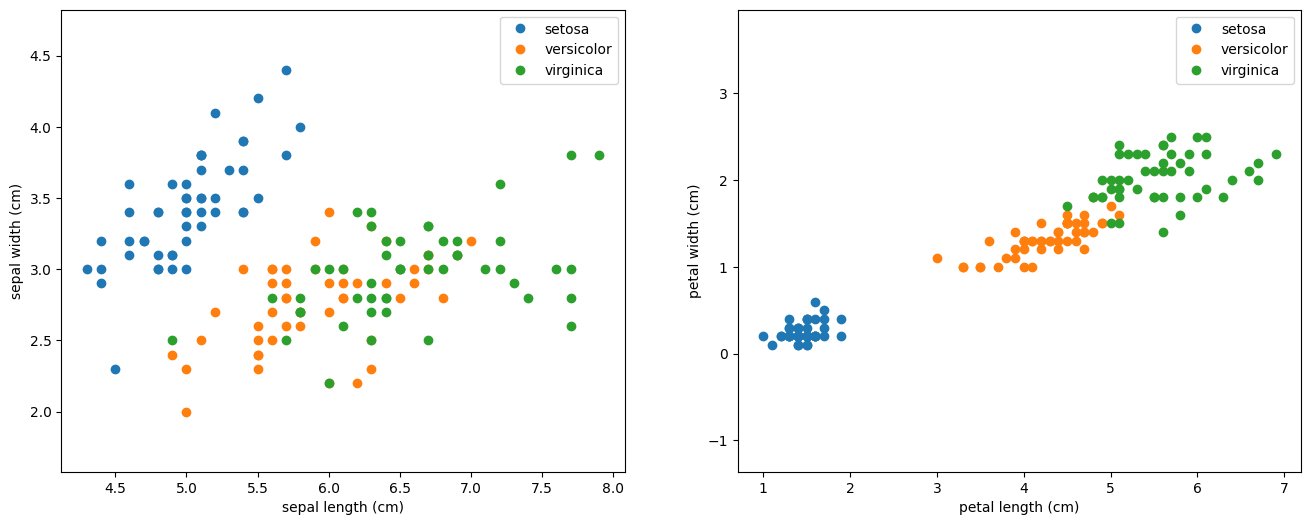

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [ ]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [ ]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 462.19it/s]


# Plot training progress

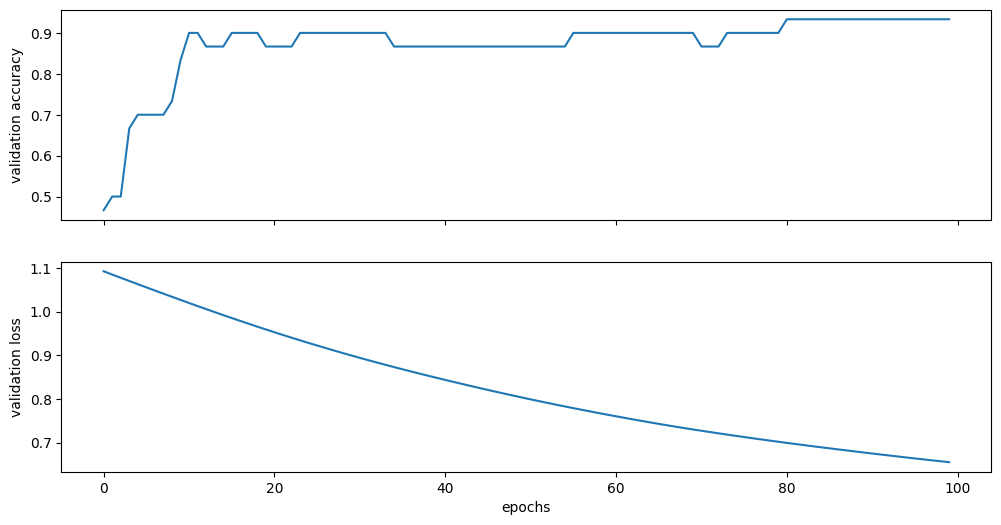

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

In [ ]:
#Q1
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm

# Define your neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)  # Single hidden layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Define your data, loss function, and optimizer

# Assuming X_train, X_test, y_train, y_test are already tensors
# Convert them to the desired data type if necessary

# Train for 100 epochs
EPOCHS = 100

# Define the number of hidden layers
hidden_layers = [4, 8, 12]  # Number of neurons in each hidden layer

for hidden_size in hidden_layers:
    # Initialize the model
    model = NeuralNetwork(input_size, hidden_size, output_size)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    loss_list = np.zeros((EPOCHS,))
    accuracy_list = np.zeros((EPOCHS,))

    for epoch in tqdm(range(EPOCHS)):
        model.train()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss_list[epoch] = loss.item()

        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
            accuracy_list[epoch] = correct.mean()

    print(f"Accuracy for {hidden_size} hidden neurons:", accuracy_list[-1])


100%|██████████| 100/100 [00:00<00:00, 642.87it/s]


Accuracy for 4 hidden neurons: 0.699999988079071


100%|██████████| 100/100 [00:00<00:00, 625.33it/s]


Accuracy for 8 hidden neurons: 0.7666666507720947


100%|██████████| 100/100 [00:00<00:00, 616.35it/s]

Accuracy for 12 hidden neurons: 0.800000011920929


In [ ]:
#Q2
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm

# Define your neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)  # Single hidden layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Define your data, loss function, and optimizer
# Assuming X_train, X_test, y_train, y_test are already tensors
# Convert them to the desired data type if necessary

# Define the dimensions of input and output layers
input_size = X_train.shape[1]  # Number of features
output_size = torch.unique(y_train).size(0)  # Number of classes

# Define the learning rate
learning_rate = 0.001  # Adjust this value as needed

# Train for 100 epochs
EPOCHS = 100

# Define the number of neurons in the hidden layer
hidden_neurons = [4, 8, 12]  # Number of neurons in the hidden layer

for hidden_size in hidden_neurons:
    # Initialize the model
    model = NeuralNetwork(input_size, hidden_size, output_size)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    loss_list = np.zeros((EPOCHS,))
    accuracy_list = np.zeros((EPOCHS,))

    for epoch in tqdm(range(EPOCHS)):
        model.train()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss_list[epoch] = loss.item()

        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
            accuracy_list[epoch] = correct.mean()

    print(f"Accuracy for {hidden_size} neurons in the hidden layer:", accuracy_list[-1])


100%|██████████| 100/100 [00:00<00:00, 524.65it/s]


Accuracy for 4 neurons in the hidden layer: 0.1666666716337204


100%|██████████| 100/100 [00:00<00:00, 551.15it/s]


Accuracy for 8 neurons in the hidden layer: 0.800000011920929


100%|██████████| 100/100 [00:00<00:00, 441.94it/s]

Accuracy for 12 neurons in the hidden layer: 0.7333333492279053


In [ ]:
#Q3
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm

# Define your neural network model with a different activation function
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)  # Single hidden layer
        self.activation = nn.Tanh()  # Hyperbolic tangent activation function
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

# Define your data, loss function, and optimizer
# Assuming X_train, X_test, y_train, y_test are already tensors
# Convert them to the desired data type if necessary

# Define the dimensions of input and output layers
input_size = X_train.shape[1]  # Number of features
output_size = torch.unique(y_train).size(0)  # Number of classes

# Define the learning rate
learning_rate = 0.001  # Adjust this value as needed

# Train for 100 epochs
EPOCHS = 100

# Define the number of neurons in the hidden layer
hidden_neurons = [4, 8, 12]  # Number of neurons in the hidden layer

for hidden_size in hidden_neurons:
    # Initialize the model
    model = NeuralNetwork(input_size, hidden_size, output_size)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    loss_list = np.zeros((EPOCHS,))
    accuracy_list = np.zeros((EPOCHS,))

    for epoch in tqdm(range(EPOCHS)):
        model.train()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss_list[epoch] = loss.item()

        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
            accuracy_list[epoch] = correct.mean()

    print(f"Accuracy for {hidden_size} neurons in the hidden layer with tanh activation function:", accuracy_list[-1])


100%|██████████| 100/100 [00:00<00:00, 276.46it/s]


Accuracy for 4 neurons in the hidden layer with tanh activation function: 0.7333333492279053


100%|██████████| 100/100 [00:00<00:00, 374.75it/s]


Accuracy for 8 neurons in the hidden layer with tanh activation function: 0.8333333134651184


100%|██████████| 100/100 [00:00<00:00, 235.21it/s]

Accuracy for 12 neurons in the hidden layer with tanh activation function: 0.8333333134651184


Q3) Using a different activation function, such as the hyperbolic tangent (tanh), can lead to changes in the behavior of the neural network model. Here are some observations

1. **Training Dynamics**: The choice of activation function can affect the training dynamics of the neural network. Activation functions like tanh have different gradients compared to ReLU, which can influence how the model learns and converges during training. Tanh has gradients in the range (-1, 1), which can help mitigate the vanishing gradient problem compared to sigmoid.

2. **Output Range**: Tanh produces output values in the range (-1, 1), whereas ReLU produces values in the range (0, +∞). This difference in output range can affect how the model learns to map inputs to outputs and can influence the stability of the training process.

3. **Model Capacity**: The choice of activation function can also impact the effective capacity of the model. Tanh tends to squash input values to a narrower range compared to ReLU, which might affect the representation power of the hidden layers and the overall expressiveness of the model.

4. **Accuracy and Performance**: The choice of activation function can lead to differences in the final accuracy and performance of the model. Some activation functions might be more suitable for certain types of data or tasks, leading to better or worse results compared to others.

5. **Overfitting**: Activation functions can also influence the model's susceptibility to overfitting. Tanh activation function tends to produce smoother outputs compared to ReLU, which might help reduce overfitting in some cases by regularizing the model.



100%|██████████| 100/100 [00:00<00:00, 220.74it/s]


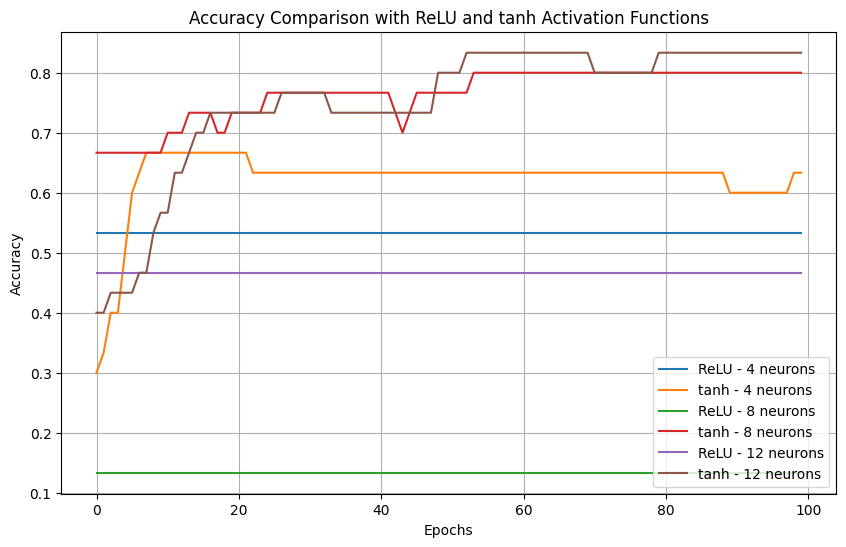

In [ ]:
#Q3
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define your neural network model with ReLU activation function
class NeuralNetworkReLU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetworkReLU, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)  # Single hidden layer
        self.activation = nn.ReLU()  # ReLU activation function
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

# Define your neural network model with tanh activation function
class NeuralNetworkTanh(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetworkTanh, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)  # Single hidden layer
        self.activation = nn.Tanh()  # Tanh activation function
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

# Define your data, loss function, and optimizer
# Assuming X_train, X_test, y_train, y_test are already tensors
# Convert them to the desired data type if necessary

# Define the dimensions of input and output layers
input_size = X_train.shape[1]  # Number of features
output_size = torch.unique(y_train).size(0)  # Number of classes

# Define the learning rate
learning_rate = 0.001  # Adjust this value as needed

# Train for 100 epochs
EPOCHS = 100

# Define the number of neurons in the hidden layer
hidden_neurons = [4, 8, 12]  # Number of neurons in the hidden layer

# Initialize lists to store accuracy for ReLU and tanh activation functions
accuracy_relu = []
accuracy_tanh = []

for hidden_size in hidden_neurons:
    # Initialize the model with ReLU activation function
    model_relu = NeuralNetworkReLU(input_size, hidden_size, output_size)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_relu.parameters(), lr=learning_rate)

    # Initialize the model with tanh activation function
    model_tanh = NeuralNetworkTanh(input_size, hidden_size, output_size)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_tanh.parameters(), lr=learning_rate)

    accuracy_list_relu = []
    accuracy_list_tanh = []

    for epoch in tqdm(range(EPOCHS)):
        model_relu.train()
        y_pred = model_relu(X_train)
        loss = loss_fn(y_pred, y_train)

        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model_relu.eval()
        with torch.no_grad():
            y_pred = model_relu(X_test)
            correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
            accuracy_list_relu.append(correct.mean().item())

        model_tanh.train()
        y_pred = model_tanh(X_train)
        loss = loss_fn(y_pred, y_train)

        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model_tanh.eval()
        with torch.no_grad():
            y_pred = model_tanh(X_test)
            correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
            accuracy_list_tanh.append(correct.mean().item())

    accuracy_relu.append(accuracy_list_relu)
    accuracy_tanh.append(accuracy_list_tanh)

# Plotting the accuracy curves for ReLU and tanh activation functions
plt.figure(figsize=(10, 6))
for i, hidden_size in enumerate(hidden_neurons):
    plt.plot(range(EPOCHS), accuracy_relu[i], label=f"ReLU - {hidden_size} neurons")
    plt.plot(range(EPOCHS), accuracy_tanh[i], label=f"tanh - {hidden_size} neurons")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison with ReLU and tanh Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


100%|██████████| 100/100 [00:00<00:00, 406.18it/s]


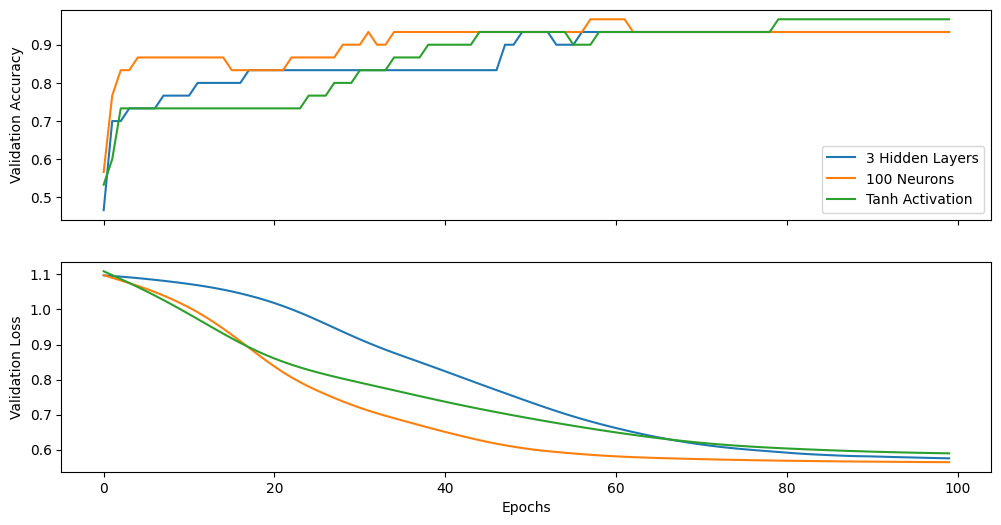

In [ ]:
#Q3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim, hidden_layers=2, neurons=50, activation=F.relu):
        super(Model, self).__init__()
        self.hidden_layers = hidden_layers
        self.activation = activation
        self.input_layer = nn.Linear(input_dim, neurons)
        self.hidden = nn.ModuleList([nn.Linear(neurons, neurons) for _ in range(hidden_layers)])
        self.output_layer = nn.Linear(neurons, 3)

    def forward(self, x):
        x = self.activation(self.input_layer(x))
        for layer in self.hidden:
            x = self.activation(layer(x))
        x = F.softmax(self.output_layer(x), dim=1)
        return x

# Training function
def train_model(model, X_train, y_train, X_test, y_test, optimizer, loss_fn, epochs=100):
    loss_list = np.zeros((epochs,))
    accuracy_list = np.zeros((epochs,))

    X_train = torch.from_numpy(X_train).float()
    X_test = torch.from_numpy(X_test).float()
    y_test = torch.from_numpy(y_test)
    y_train = torch.from_numpy(y_train)

    for epoch in tqdm.trange(epochs):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss_list[epoch] = loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            y_pred = model(X_test)
            correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
            accuracy_list[epoch] = correct.mean()

    return loss_list, accuracy_list

# Experiment 1: Change number of hidden layers
model_hidden_layers = Model(X_train.shape[1], hidden_layers=3)
optimizer_hidden_layers = torch.optim.Adam(model_hidden_layers.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
loss_list_hidden_layers, accuracy_list_hidden_layers = train_model(model_hidden_layers, X_train, y_train, X_test, y_test, optimizer_hidden_layers, loss_fn)

# Experiment 2: Change number of neurons in the hidden layer
model_neurons = Model(X_train.shape[1], neurons=100)
optimizer_neurons = torch.optim.Adam(model_neurons.parameters(), lr=0.001)
loss_list_neurons, accuracy_list_neurons = train_model(model_neurons, X_train, y_train, X_test, y_test, optimizer_neurons, loss_fn)

# Experiment 3: Use a different activation function (e.g., tanh)
model_activation = Model(X_train.shape[1], activation=F.tanh)
optimizer_activation = torch.optim.Adam(model_activation.parameters(), lr=0.001)
loss_list_activation, accuracy_list_activation = train_model(model_activation, X_train, y_train, X_test, y_test, optimizer_activation, loss_fn)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list_hidden_layers, label='3 Hidden Layers')
ax1.plot(accuracy_list_neurons, label='100 Neurons')
ax1.plot(accuracy_list_activation, label='Tanh Activation')
ax1.set_ylabel("Validation Accuracy")
ax1.legend()

ax2.plot(loss_list_hidden_layers, label='3 Hidden Layers')
ax2.plot(loss_list_neurons, label='100 Neurons')
ax2.plot(loss_list_activation, label='Tanh Activation')
ax2.set_ylabel("Validation Loss")
ax2.set_xlabel("Epochs")
plt.show()